In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Define base salary ranges for each sector
sectors = {
    "Tecnologia da Informação": [50000, 70000, 84000, 105000, 136500, 210000],
    "Saúde": [40000, 56000, 67200, 84000, 109200, 168000],
    "Educação": [30000, 42000, 50400, 63000, 81900, 126000],
    "Finanças": [50000, 70000, 84000, 105000, 136500, 210000],
    "Varejo": [25000, 35000, 42000, 52500, 68250, 105000],
    "Indústria Manufatureira": [30000, 42000, 50400, 63000, 81900, 126000],
    "Construção Civil": [35000, 49000, 58800, 73500, 95550, 147000],
    "Agricultura": [20000, 28000, 33600, 42000, 54600, 84000],
    "Transporte e Logística": [25000, 35000, 42000, 52500, 68250, 105000],
    "Telecomunicações": [40000, 56000, 67200, 84000, 109200, 168000],
    "Energia": [45000, 63000, 75600, 94500, 122850, 189000],
    "Mídia e Entretenimento": [30000, 42000, 50400, 63000, 81900, 126000],
    "Hotelaria e Turismo": [20000, 28000, 33600, 42000, 54600, 84000],
    "Serviços Jurídicos": [40000, 56000, 67200, 84000, 109200, 168000],
    "Recursos Humanos": [30000, 42000, 50400, 63000, 81900, 126000],
    "Marketing e Publicidade": [30000, 42000, 50400, 63000, 81900, 126000],
    "Pesquisa e Desenvolvimento": [40000, 56000, 67200, 84000, 109200, 168000],
    "Farmacêutica": [45000, 63000, 75600, 94500, 122850, 189000],
    "Automotivo": [35000, 49000, 58800, 73500, 95550, 147000],
    "Alimentação e Bebidas": [25000, 35000, 42000, 52500, 68250, 105000],
    "Consultoria Empresarial": [50000, 70000, 84000, 105000, 136500, 210000],
    "Seguros": [40000, 56000, 67200, 84000, 109200, 168000],
    "Imobiliário": [35000, 49000, 58800, 73500, 95550, 147000],
    "Mineração": [40000, 56000, 67200, 84000, 109200, 168000],
    "Petróleo e Gás": [50000, 70000, 84000, 105000, 136500, 210000],
    "Serviços Ambientais": [30000, 42000, 50400, 63000, 81900, 126000],
    "Aeroespacial": [45000, 63000, 75600, 94500, 122850, 189000],
    "Biotecnologia": [40000, 56000, 67200, 84000, 109200, 168000],
    "Comércio Exterior": [35000, 49000, 58800, 73500, 95550, 147000],
    "Serviços Financeiros": [50000, 70000, 84000, 105000, 136500, 210000],
    "Administração Pública": [25000, 35000, 42000, 52500, 68250, 105000],
    "Organizações Sem Fins Lucrativos": [20000, 28000, 33600, 42000, 54600, 84000],
    "Esportes e Recreação": [20000, 28000, 33600, 42000, 54600, 84000],
    "Artes e Cultura": [20000, 28000, 33600, 42000, 54600, 84000],
    "Segurança e Vigilância": [25000, 35000, 42000, 52500, 68250, 105000],
}

In [28]:
# Function to generate salaries for each sector
def generate_salaries(sector_ranges, num_samples):
    data = []
    for sector, ranges in sector_ranges.items():
        entry_level = np.random.randint(ranges[0], ranges[1], num_samples)
        mid_career = np.random.randint(ranges[2], ranges[3], num_samples)
        senior_level = np.random.randint(ranges[4], ranges[5], num_samples)

        for i in range(num_samples):
            data.append({"Sector": sector, "Level": "Entry", "Salary": entry_level[i]})
            data.append({"Sector": sector, "Level": "Mid", "Salary": mid_career[i]})
            data.append({"Sector": sector, "Level": "Senior", "Salary": senior_level[i]})
    return pd.DataFrame(data)

In [29]:
# Generate dataset
num_samples_per_sector = 100
dataset = generate_salaries(sectors, num_samples_per_sector)

Generate CSV

In [41]:
dataset.to_csv("synthetic_salaries.csv", index=False)

═══════════════════════════════════════════════════════════════════════════

Data Validation and Salary Distribution Analysis
─────────────────────────────────────────────────────────────────────────── 

This section contains:

• Data validation checks for generated salary ranges

• Statistical analysis of salary progression across career levels

• Visualization of salary distributions and sector comparisons

═══════════════════════════════════════════════════════════════════════════

In [31]:
assert dataset['Salary'].between(dataset.groupby('Sector')['Salary'].min().min(),
                                  dataset.groupby('Sector')['Salary'].max().max()).all(), "Salaries exceed defined ranges!"


In [32]:
summary = dataset.groupby(['Sector', 'Level'])['Salary'].mean().unstack()
print(summary)

Level                                Entry       Mid     Senior
Sector                                                         
Administração Pública             29724.39  47719.93   87190.94
Aeroespacial                      54206.36  85419.56  153714.90
Agricultura                       23829.35  37439.50   70194.23
Alimentação e Bebidas             30074.13  47684.71   87694.29
Artes e Cultura                   23967.69  37926.89   68423.56
Automotivo                        41405.57  67074.87  122184.21
Biotecnologia                     46804.81  75680.52  137694.02
Comércio Exterior                 42637.39  66212.01  121828.95
Construção Civil                  42201.68  65581.11  119230.59
Consultoria Empresarial           59734.96  94179.27  170417.61
Educação                          36012.32  56795.52  104003.68
Energia                           53186.21  84247.41  155784.12
Esportes e Recreação              24282.19  37955.41   68424.77
Farmacêutica                      53556.

### This should be:
- Entry to Mid: 1.2 ~ 1.5
- Mid to Senior: 1.3 ~ 2.0
(needs adjusting)

In [33]:
progression = dataset.groupby(['Sector', 'Level'])['Salary'].mean().unstack()
progression_ratio_entry_mid = progression['Mid'] / progression['Entry']
progression_ratio_mid_senior = progression['Senior'] / progression['Mid']
print(progression_ratio_entry_mid.mean(), progression_ratio_mid_senior.mean())


1.573850953452458 1.8357274127511476


/tmp/ipykernel_614029/1906057060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y='Salary', data=dataset,


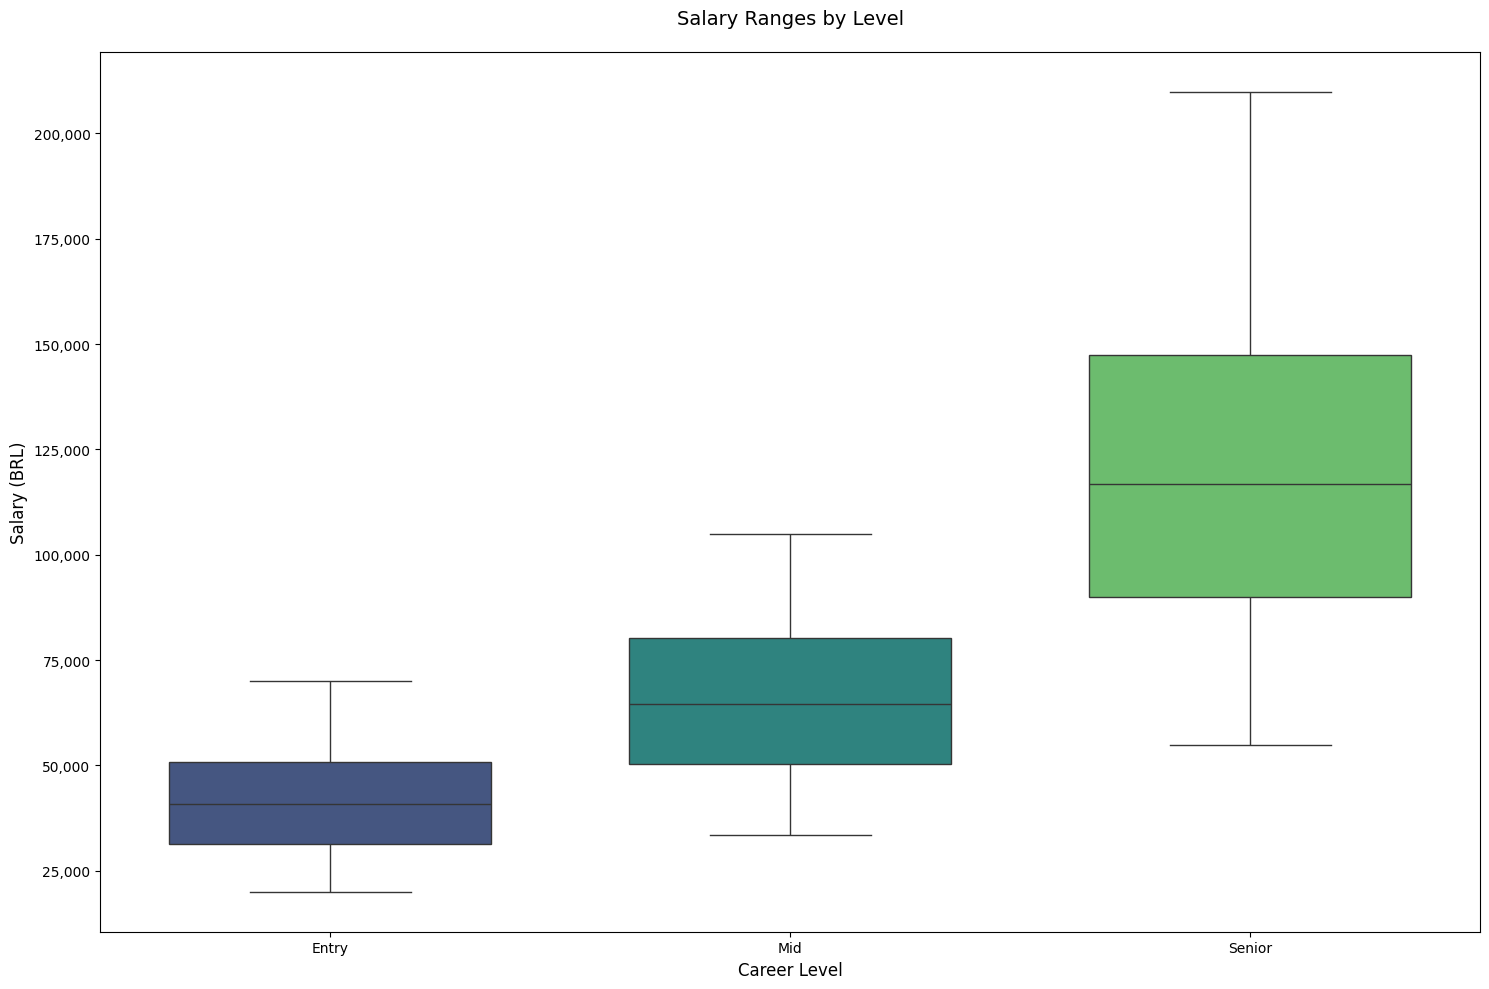

In [34]:
# Create a larger figure for better readability
plt.figure(figsize=(15, 10))

# Create boxplot with modified parameters
sns.boxplot(x='Level', y='Salary', data=dataset, 
            palette='viridis',  # Use a different color palette
            width=0.7,         # Adjust box width
            showfliers=False)   # Hide outliers for cleaner visualization

# Customize the plot
plt.title('Salary Ranges by Level', fontsize=14, pad=20)
plt.xlabel('Career Level', fontsize=12)
plt.ylabel('Salary (BRL)', fontsize=12)

# Format y-axis to show thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Adjust layout
plt.tight_layout()
plt.show()

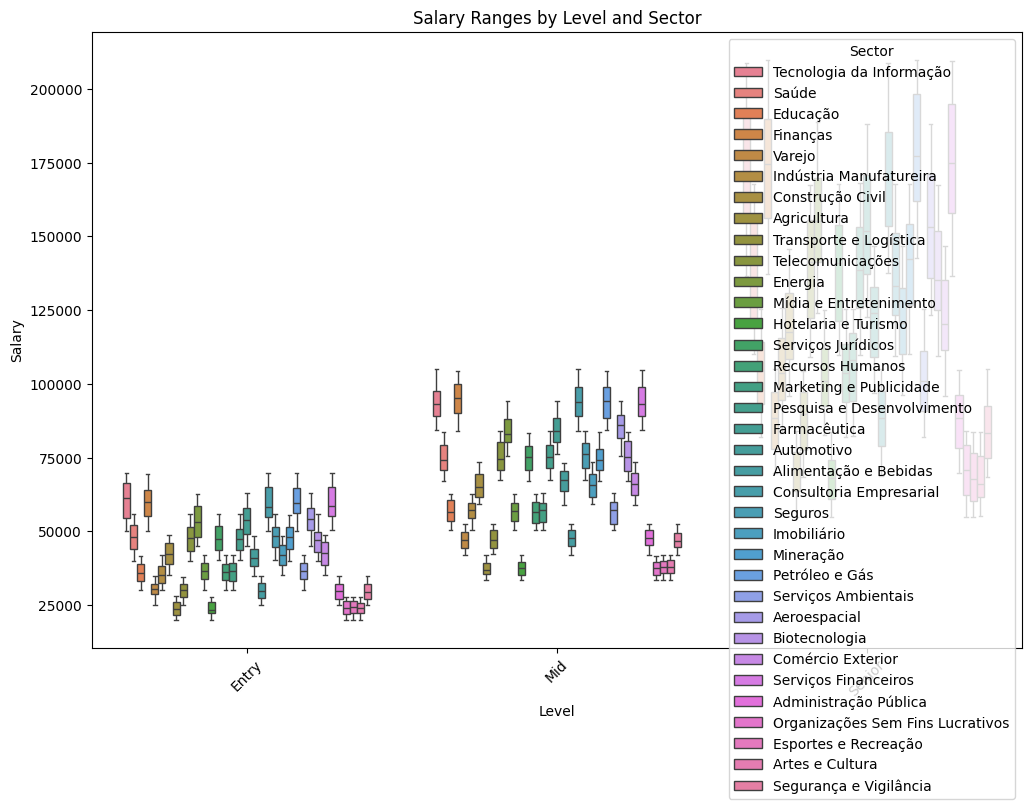

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Level', y='Salary', hue='Sector', data=dataset)
plt.title('Salary Ranges by Level and Sector')
plt.xticks(rotation=45)
plt.show()

<Axes: >

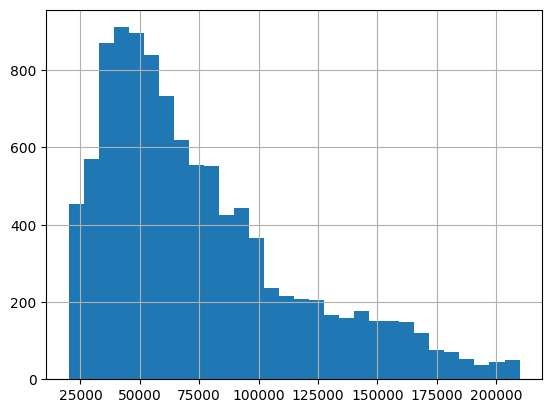

In [36]:
dataset['Salary'].hist(bins=30)


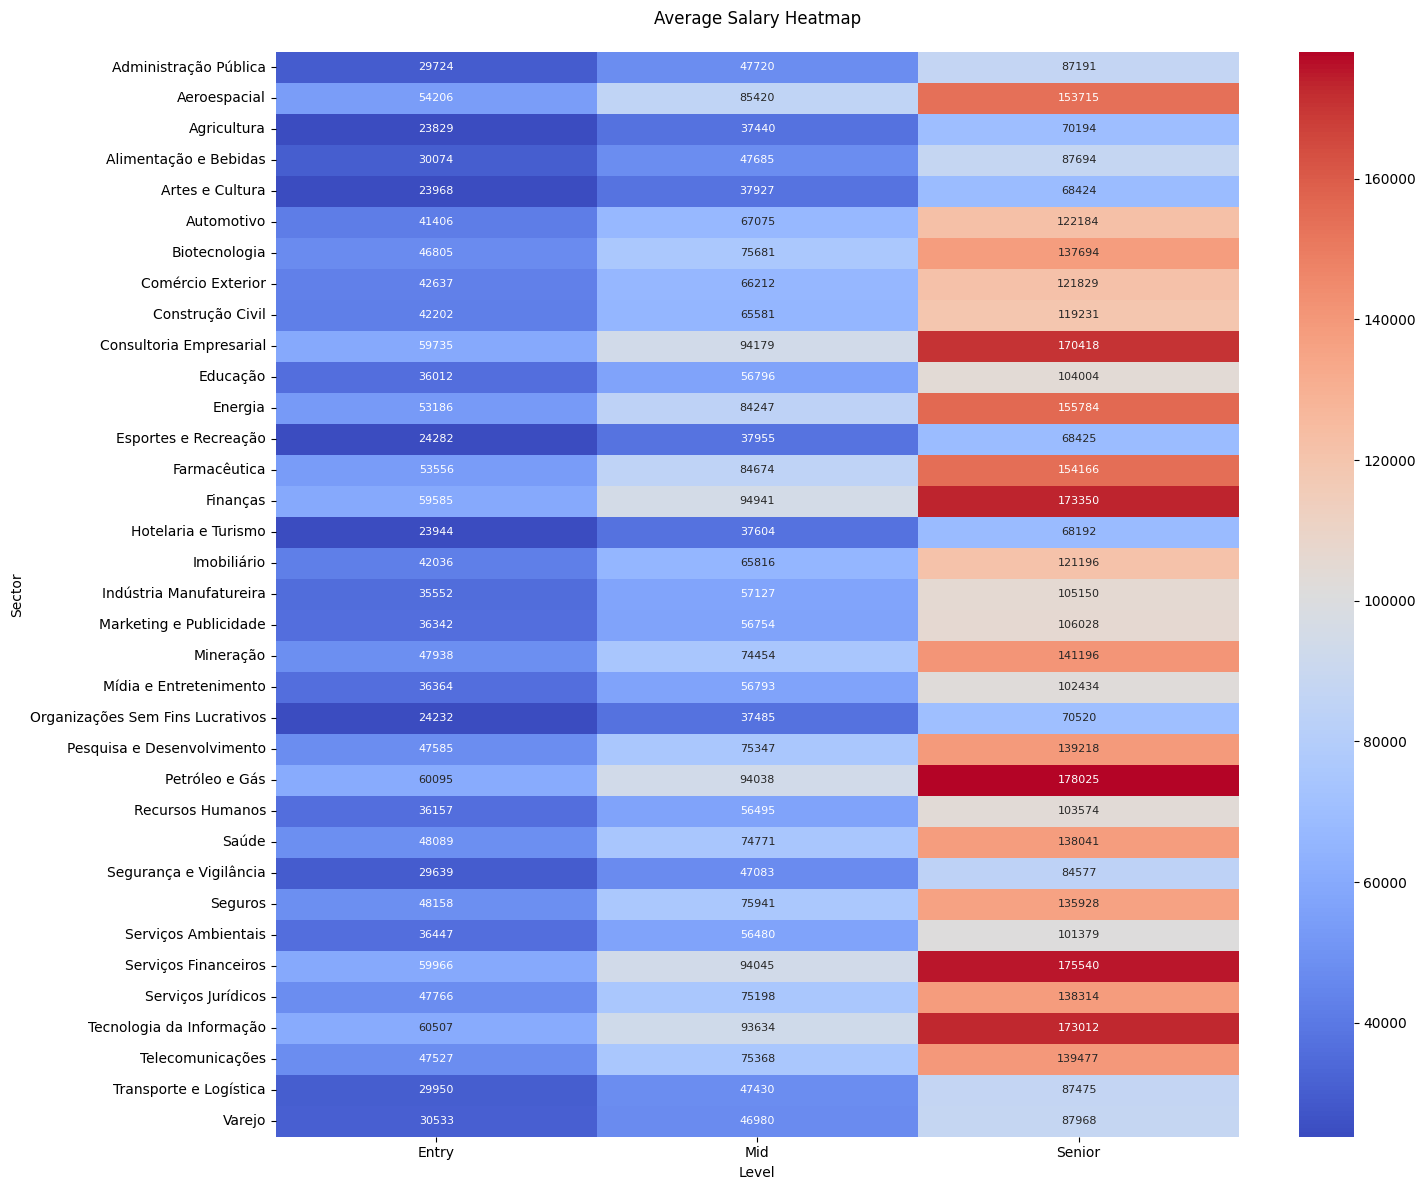

In [37]:
# Create a larger figure
plt.figure(figsize=(15, 12))

# Create the pivot table and heatmap
pivot = dataset.pivot_table(values='Salary', index='Sector', columns='Level', aggfunc='mean')
sns.heatmap(pivot, annot=True, 
            fmt='.0f',  # Format as float with 0 decimal places
            cmap="coolwarm",
            annot_kws={'size': 8})  # Reduce font size

plt.title('Average Salary Heatmap', pad=20)  # Add padding to prevent title overlap
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [38]:
level_dummies = pd.get_dummies(dataset['Level'])
salary_corr = pd.concat([dataset['Salary'], level_dummies], axis=1).corr()
print(salary_corr)

          Salary     Entry       Mid   Senior
Salary  1.000000 -0.582275 -0.175445  0.75772
Entry  -0.582275  1.000000 -0.500000 -0.50000
Mid    -0.175445 -0.500000  1.000000 -0.50000
Senior  0.757720 -0.500000 -0.500000  1.00000
